<a href="https://colab.research.google.com/github/Javsk891/M-estimadores-Danish-Couchy/blob/main/Final_No_Param%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estadística No Paramétrica - Estimadores Danish y Couchy

###Importamos las librerias a utilizar

In [ ]:
!pip install palmerpenguins # Install the palmerpenguins package
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins # Import the function after installing the package
import pandas as pd

In [ ]:
#Programar la variable X1
n = 1000 #Tamañode la muestra

np.random.seed(1044) #Setear la semilla

#Generar muestras de cada distribución
muestra1=np.random.normal(loc=3,scale=0.8,size=n//4)
muestra2=np.random.normal(loc=6,scale=0.8,size=n//2)
muestra3=np.random.normal(loc=9,scale=0.8,size=n//4)

#Combinar las muestras para tener X1
X1=np.concatenate([muestra1,muestra2,muestra3])

#Programar la variable X2

np.random.seed(5217) #Setear la semilla

#Generar las muestras de cada distribución
muestra_1=np.random.normal(loc=3,scale=0.8,size=2*n//5)
muestra_2=np.random.normal(loc=6,scale=0.8,size=n//5)
muestra_3=np.random.normal(loc=9,scale=0.8,size=2*n//5)

#Combinar las muestras para tener X2
X2=np.concatenate([muestra_1,muestra_2,muestra_3])

#Programar la variable X3

np.random.seed(17) #Setear la semilla

#Generar las muestras de cada distribución
muestr1=np.random.normal(loc=3,scale=0.8,size=4*n//7)
muestr2=np.random.normal(loc=6,scale=0.8,size=2*n//7)
muestr3=np.random.normal(loc=9,scale=0.8,size=n//7)

#Combinar las muestras para tener X3
X3=np.concatenate([muestr1,muestr2,muestr3])

#Definmos los métodos a utilizar

In [ ]:
def Epanechnikov(X,c=2):
  K =np.zeros(len(X))
  K[abs(X)<c]= (3/(4*c))*(1-(X[abs(X)<c]/c)**2)
  return K

def KDEChart(X):
  n= len(X)
  sigma_gorro = min(np.std(X),(np.quantile(X,0.75)-np.quantile(X,0.25))/1.34)
  h= 1.06*sigma_gorro/(n**(1/5))
  x = np.linspace(min(X),max(X),1000)
  fx = []
  for i in range(len(x)):
    fx.append((1/n)*sum((1/h)*norm.pdf((x[i]-X)/h)))
  print("KDE")
  plt.hist(X,density=True)
  plt.plot(x,np.array(fx),'.')
  return([x,np.array(fx)])

def KDE(X):
  n= len(X)
  sigma_gorro = min(np.std(X),(np.quantile(X,0.75)-np.quantile(X,0.25))/1.34)
  h= 1.06*sigma_gorro/(n**(1/5))
  x = np.linspace(min(X),max(X),1000)
  fx = []
  for i in range(len(x)):
    fx.append((1/n)*sum((1/h)*norm.pdf((x[i]-X)/h)))
  return([x,np.array(fx)])
def KDE_Epa(X):
  n= len(X)
  sigma_gorro = min(np.std(X),(np.quantile(X,0.75)-np.quantile(X,0.25))/1.34)
  h= 1.06*sigma_gorro/(n**(1/5))
  x = np.linspace(min(X),max(X),1000)
  fx = []
  for i in range(len(x)):
    K= Epanechnikov((x[i]-X)/h,c=3)
    fx.append((1/n)*sum((1/h)*K))
  print("KDE_Epanechnikov")
  plt.hist(X,density=True)
  plt.plot(x,np.array(fx),'.')
  return([x,np.array(fx)])

def pivotal_int(x,p,percentile):
  x= np.array(x)
  p= np.array(p)
  diff= np.abs(p-(percentile/100))
  closest= diff.argmin()
  closests= np.where(diff== diff[closest])[0]
  if len(closests)>1:
    closest_value= np.mean(x[closests])
  else:
    closest_value= x[closest]
  return closest_value
def ECDF(x):
  x=sorted(x)
  ECDF=[]
  n= len(x)
  for i in range(n):
    ECDF.append(i/n) ## Calcular la probabilidad

  return [x,ECDF]
def IC(boot):
    median_ecdf=ECDF(boot["Distro"])
    print(f"I.C. 95%: [{pivotal_int(median_ecdf[0],median_ecdf[1],25)},{pivotal_int(median_ecdf[0],median_ecdf[1],97.5)}]")
def T(x):
  return(np.mean(x))
def bootstrap_estimator(X,T,B= 1000):
  ## B es cuantas muestras voy a generar
  X= np.array(X)
  T_boots= []
  n=len(X)
  for _ in range(B):
    resample_indexes= np.random.choice(n,n,replace=True) ##permitida en el parcial
    x_resample= X[resample_indexes]
    T_boots.append(T(x_resample))

  T_boots= np.array(T_boots)
  T_boot=np.mean(T_boots) ## Calculo del estimador
  var_boot= np.mean((T_boots-np.mean(T_boots))**2) ## Varianza del bootstrap

  return ({"Distro": T_boots,
           "Estimador": T_boot,
           "VarEstimador": var_boot})

def bootstrap_estimator2(X,T,T2,B= 1000):
  ## B es cuantas muestras voy a generar
  X= np.array(X)
  T_boots= []
  T_boots2=[]
  n=len(X)
  for _ in range(B):
    resample_indexes= np.random.choice(n,n,replace=True) ##permitida en el parcial
    x_resample= X[resample_indexes]
    T_boots.append(T(x_resample))
    T_boots2.append(T2(x_resample))

  T_boots= np.array(T_boots)
  T_boots2= np.array(T_boots2)
  T_boot=np.mean(T_boots) ## Calculo del estimador
  T_boot2=np.mean(T_boots2)
  var_boot= np.mean((T_boots-np.mean(T_boots))**2) ## Varianza del bootstrap
  var_boot2= np.mean((T_boots2-np.mean(T_boots2))**2)

  return ({"Distro": T_boots,
           "Estimador": T_boot,
           "VarEstimador": var_boot},{"Distro": T_boots2,
           "Estimador": T_boot2,
           "VarEstimador": var_boot2})


def MAD(x, k = (1/0.6745)):
  x_tilde = np.median(x)
  return(k * np.median(np.abs(x-x_tilde)))

def M_estimator(y, X,T, tol = 1e-5, iter_max = 1000):
  beta_0 = OLS(y, X)
  e = (y - X.dot(beta_0.reshape(-1, 1)).reshape(1, -1)[0])
  sigma = MAD(e)
  e_s = e/sigma
  wii = T(e_s)/e_s
  iter = 0

  while True:
    W = np.diag(wii)
    beta = np.linalg.inv(np.transpose(X)@W@X)@np.transpose(X)@W@y
    iter += 1

    if np.sqrt(sum((beta_0 - beta)**2)) < tol:
      break
    if iter == iter_max:
      break

    beta_0 = beta
    e = (y - X.dot(beta_0.reshape(-1, 1)).reshape(1, -1)[0])
    sigma = MAD(e)
    e_s = e/sigma
    wii = T(e_s)/e_s

  print(f"Numero de iteraciones: {iter}")
  return(beta)

##Distribuciones de densidad utilizando Kernel Gaussiano y Kernel Epanechnikov (Puntos 1 y 2)

Figura 1
KDE


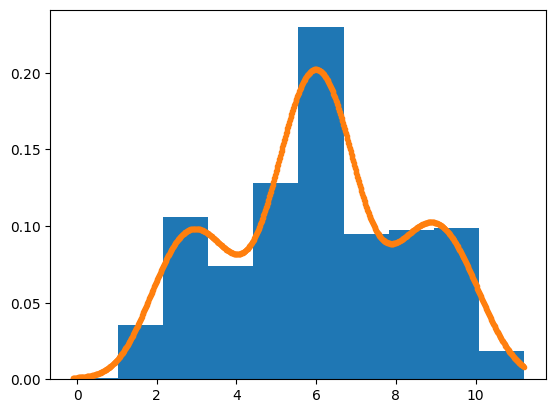

KDE_Epanechnikov


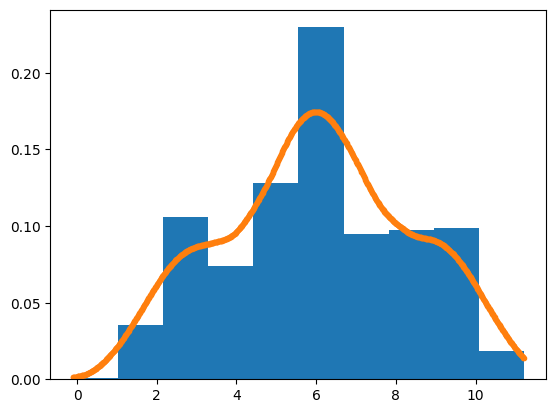

Intervalo de confianza X1
I.C. 95%: [5.96221645630189,6.149874342771875]

Figura 2
KDE


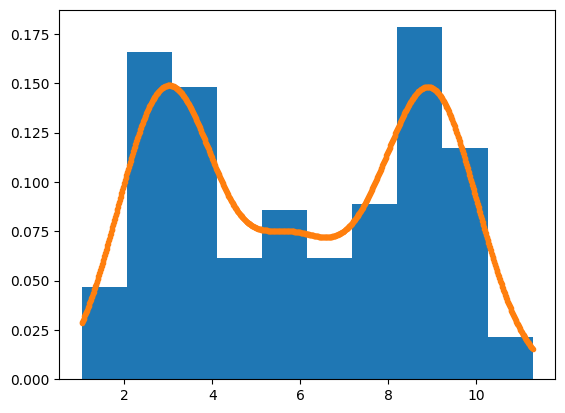

KDE_Epanechnikov


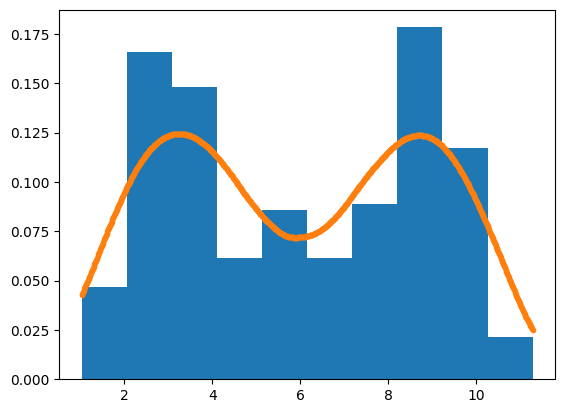

Intervalo de confianza X2
I.C. 95%: [5.9067000345408545,6.14306374641406]

Figura 3
KDE


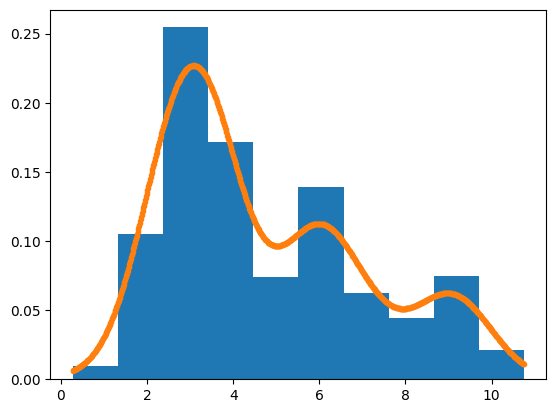

KDE_Epanechnikov


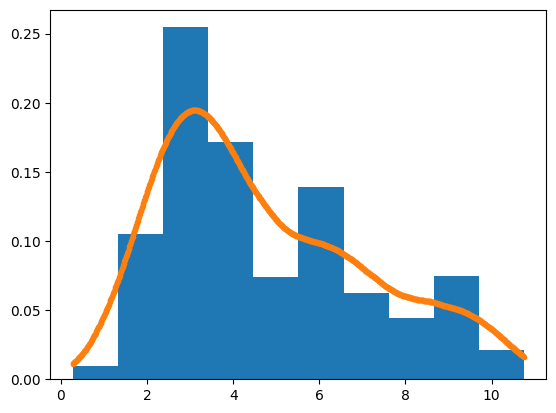

Intervalo de confianza X3
I.C. 95%: [4.682470433821087,4.867508075856647]


In [ ]:
boot_X1= bootstrap_estimator(X1,T)
boot_X2= bootstrap_estimator(X2,T)
boot_X3= bootstrap_estimator(X3,T)
print("Figura 1")
KDEChart(X1)
plt.show()
KDE_Epa(X1)
plt.show()
print("Intervalo de confianza X1")
IC(boot_X1)
print("\nFigura 2")
KDEChart(X2)
plt.show()
KDE_Epa(X2)
plt.show()
print("Intervalo de confianza X2")
IC(boot_X2)
print("\nFigura 3")
KDEChart(X3)
plt.show()
KDE_Epa(X3)
plt.show()
print("Intervalo de confianza X3")
IC(boot_X3)

##Prueba de Mann-Whitney (Punto 3)

In [ ]:
def mannWhitneyU(x,y):
  n1=len(x)
  n2=len(y)
  combine=np.append(x,y)
  rank=np.argsort(combine)
  U1=n1*n2 + (n1*(n1+1))/2 - sum(rank[:n1])
  U2=n1*n2 + (n2*(n2+1))/2 - sum(rank[n1:])
  U=min(U1,U2)
  muU=n1*n2/2
  sigmaU=n1*n2*(n1+n2+1)/12**0.5
  z_score=(U-muU)/sigmaU
  p_value = 2 * (1 - norm.cdf(abs(z_score)))
  return p_value
def OLS(y,X):
  '''Esta funcion calcula los coeficientes de regresion usando la
  solucion matricial via OLS del modelo de regresion linean.
  Input:
    y: variable respuesta
    X: Matriz de disenho
  Output:
    betas: vector de coeficientes de regresion
    '''
  ## aca estamos hacienco (XtX)-1XtY  Xt=es la transpuesta de X , este calculo es los betas
  betas=np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)
  return betas

###Hacemos la prueba de Mann-Whitney para las comparaciones entre X1 vs X2, X1 vs X3 y X2 vs X3

In [ ]:
print(mannWhitneyU(X1,X2))
print(mannWhitneyU(X1,X3))
print(mannWhitneyU(X2,X3))

0.9997131055320618
0.9999124333402232
0.9998030820422539


#Comparación de los resultados de la prueba de Mann-Whitney entre X1, X2 y x3

###Al analizar los resultados obtenidos, se puede observar que los p valores e intervalos de confianza muestran que las variables x1 y x2 no presentan diferencias significativas entre sí. Aunque los gráficos de densidad muestran algunas variaciones, los resultados sugieren que incluso x3 se comporta de manera similar en este aspecto. Se puede concluir que la proximidad de los intervalos de confianza de x1 y x2 indica una similitud notable entre estas dos variables.

#Aplicación de M-estimadores Danish y Couchy al dataset 'Penguins' (Puntos 4 y 5)

In [ ]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
#Visualizamos los valores unicos contenidos dentro de la variable 'species'
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

#Estimadores elegidos: Danish y Couchy

#Estimador Danish

###Programamos el estimador Danish

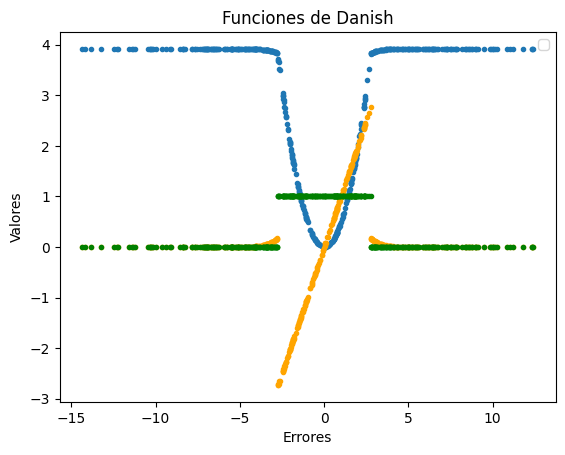

In [ ]:
#Definimos la función Danish, que ecalcula el estimador Danish para un conjunto de errores
def danish_rho(errores, CDa=2.76705, DDa=3.91523):
  rho=[]
  for e in errores:
    if abs(e)<=CDa:
      rho.append((e**2)/2)
    else:
      rho.append((-CDa/2)*np.exp(-abs(e)**2/CDa)+DDa)
  return(np.array(rho))

#Definimos la función de influencia (psi)
def danish_psi(errores, CDa=2.76705, DDa=3.91523):
  psi=[]
  for e in errores:
    if abs(e)<=CDa:
      psi.append(e)
    else:
      psi.append(abs(e)*np.exp((-abs(e)**2)/CDa))
  return(np.array(psi))

#Definimos la función de pesos, que calcula la función de pesos Danish para un conjunto de errores
def danish_W(errores, CDa=2.76705, DDa=3.91523):
  W=[]
  for e in errores:
    if abs(e)<=CDa:
      W.append(1)
    else:
      W.append(0)
  return(np.array(W))

e = np.random.normal(size = 500, loc = 0, scale = 5)
rhos = danish_rho(e)
psis = danish_psi(e)
ws = danish_W(e)

plt.plot(e, rhos, '.')
plt.plot(e, psis, '.', color = "orange")
plt.plot(e, ws, '.', color = "green")

# Etiquetas y título
plt.xlabel('Errores')
plt.ylabel('Valores')
plt.title('Funciones de Danish')
plt.legend()  # Agregar leyenda

#Estimador Cauchy
###Programamos el estimador Couchy

In [ ]:
def cauchy_rho(errores, Cc=2.3849):
  rho=[]
  for e in errores:
    rho.append((Cc**2/2)*np.log(1+e**2/Cc**2))
  return(np.array(rho))

def cauchy_psi(errores, Cc=2.3849):
  psi=[]
  for e in errores:
    psi.append(e/(1+(e**2/Cc**2)))
  return(np.array(psi))

def cauchy_W(errores, Cc=2.3849):
  W=[]
  for e in errores:
    W.append(1/(1+(e**2/Cc**2)))
  return(np.array(W))

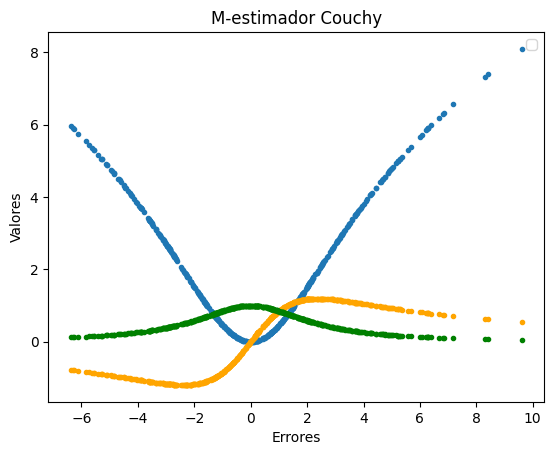

In [ ]:
e = np.random.normal(size = 500, loc = 0, scale = 3)
rhos = cauchy_rho(e)
psis = cauchy_psi(e)
ws = cauchy_W(e)

plt.plot(e, rhos, '.')
plt.plot(e, psis, '.', color = "orange")
plt.plot(e, ws, '.', color = "green")

# Etiquetas y título
plt.xlabel('Errores')
plt.ylabel('Valores')
plt.title('M-estimador Couchy')
plt.legend()  # Agregar leyenda

#Aplicación de los estimadores Danish y Couchy al conjunto de datos 'Penguins'

In [ ]:
penguins= penguins.dropna(subset=['flipper_length_mm','species','bill_length_mm'])
y= penguins['bill_length_mm']
x= penguins[['flipper_length_mm','species']]
binary_df= pd.get_dummies(x['species'],drop_first=True,dtype=int)
x= x.drop('species',axis=1)
x= pd.concat([x,binary_df],axis=1)
x.columns

Index(['flipper_length_mm', 'Chinstrap', 'Gentoo'], dtype='object')

Numero de iteraciones: 3
Numero de iteraciones: 9


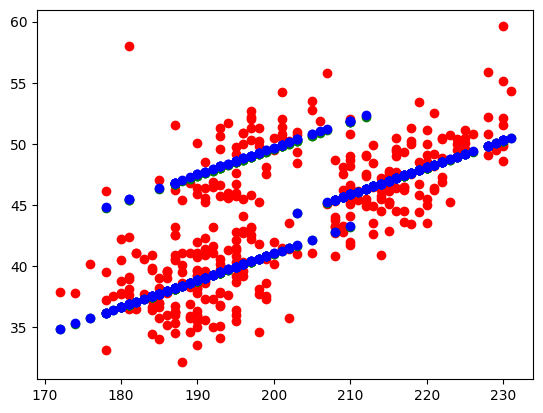

In [ ]:
m1= M_estimator(y,np.column_stack([np.ones(len(x)),x]),T=danish_psi)
m2= M_estimator(y,np.column_stack([np.ones(len(x)),x]),T=cauchy_psi)
xm1= m1[0] + m1[1]*x['flipper_length_mm']+ m1[2]*x['Chinstrap']+ m1[3]*x['Gentoo']
xm2= m2[0] + m2[1]*x['flipper_length_mm']+ m2[2]*x['Chinstrap']+ m2[3]*x['Gentoo']
plt.scatter(x['flipper_length_mm'],y,c='red')
plt.scatter(x['flipper_length_mm'],xm1,c='green')
plt.scatter(x['flipper_length_mm'],xm2,c='blue')

In [ ]:
bootecdf, bootKDE= bootstrap_estimator2(x['flipper_length_mm'],T=ECDF,T2=KDE,B=100)

In [ ]:
bootecdf

{'Distro': array([[[1.74000000e+02, 1.78000000e+02, 1.78000000e+02, ...,
          2.30000000e+02, 2.30000000e+02, 2.30000000e+02],
         [0.00000000e+00, 2.92397661e-03, 5.84795322e-03, ...,
          9.91228070e-01, 9.94152047e-01, 9.97076023e-01]],
 
        [[1.72000000e+02, 1.74000000e+02, 1.74000000e+02, ...,
          2.30000000e+02, 2.30000000e+02, 2.30000000e+02],
         [0.00000000e+00, 2.92397661e-03, 5.84795322e-03, ...,
          9.91228070e-01, 9.94152047e-01, 9.97076023e-01]],
 
        [[1.78000000e+02, 1.78000000e+02, 1.78000000e+02, ...,
          2.30000000e+02, 2.30000000e+02, 2.30000000e+02],
         [0.00000000e+00, 2.92397661e-03, 5.84795322e-03, ...,
          9.91228070e-01, 9.94152047e-01, 9.97076023e-01]],
 
        ...,
 
        [[1.72000000e+02, 1.74000000e+02, 1.74000000e+02, ...,
          2.30000000e+02, 2.31000000e+02, 2.31000000e+02],
         [0.00000000e+00, 2.92397661e-03, 5.84795322e-03, ...,
          9.91228070e-01, 9.94152047e-01, 9.97076

In [ ]:
bootKDE

{'Distro': array([[[1.74000000e+02, 1.74056056e+02, 1.74112112e+02, ...,
          2.29887888e+02, 2.29943944e+02, 2.30000000e+02],
         [2.88146041e-03, 2.92915716e-03, 2.97739901e-03, ...,
          5.18872908e-03, 5.15011122e-03, 5.11146727e-03]],
 
        [[1.72000000e+02, 1.72058058e+02, 1.72116116e+02, ...,
          2.29883884e+02, 2.29941942e+02, 2.30000000e+02],
         [2.04466671e-03, 2.07730120e-03, 2.11037160e-03, ...,
          6.16501806e-03, 6.12040755e-03, 6.07578790e-03]],
 
        [[1.78000000e+02, 1.78052052e+02, 1.78104104e+02, ...,
          2.29895896e+02, 2.29947948e+02, 2.30000000e+02],
         [7.49429137e-03, 7.57272345e-03, 7.65144848e-03, ...,
          6.27296864e-03, 6.23215904e-03, 6.19123707e-03]],
 
        ...,
 
        [[1.72000000e+02, 1.72059059e+02, 1.72118118e+02, ...,
          2.30881882e+02, 2.30940941e+02, 2.31000000e+02],
         [2.30310462e-03, 2.34321464e-03, 2.38389423e-03, ...,
          4.15986464e-03, 4.12059316e-03, 4.08141